Epoch 1/100
0s - loss: 0.0842
Epoch 2/100
0s - loss: 0.0329
Epoch 3/100
0s - loss: 0.0162
Epoch 4/100
0s - loss: 0.0120
Epoch 5/100
0s - loss: 0.0103
Epoch 6/100
0s - loss: 0.0090
Epoch 7/100
0s - loss: 0.0079
Epoch 8/100
0s - loss: 0.0070
Epoch 9/100
0s - loss: 0.0062
Epoch 10/100
0s - loss: 0.0056
Epoch 11/100
0s - loss: 0.0051
Epoch 12/100
0s - loss: 0.0047
Epoch 13/100
0s - loss: 0.0045
Epoch 14/100
0s - loss: 0.0042
Epoch 15/100
0s - loss: 0.0042
Epoch 16/100
0s - loss: 0.0040
Epoch 17/100
0s - loss: 0.0040
Epoch 18/100
0s - loss: 0.0038
Epoch 19/100
0s - loss: 0.0037
Epoch 20/100
0s - loss: 0.0037
Epoch 21/100
0s - loss: 0.0037
Epoch 22/100
0s - loss: 0.0035
Epoch 23/100
0s - loss: 0.0034
Epoch 24/100
0s - loss: 0.0035
Epoch 25/100
0s - loss: 0.0033
Epoch 26/100
0s - loss: 0.0032
Epoch 27/100
0s - loss: 0.0031
Epoch 28/100
0s - loss: 0.0031
Epoch 29/100
0s - loss: 0.0030
Epoch 30/100
0s - loss: 0.0029
Epoch 31/100
0s - loss: 0.0029
Epoch 32/100
0s - loss: 0.0029
Epoch 33/100
0s -

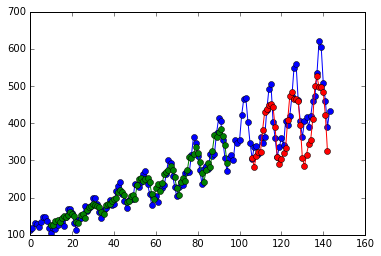

Test Score: 56.8289 RMSE
Simple Score: 49.3961 RMSE
Train Score: 20.3534 RMSE


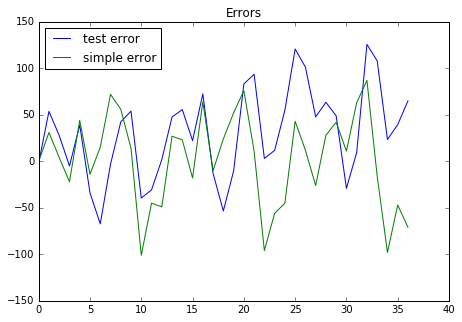

In [9]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
import utils as ut
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('./data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),'-o')
plt.plot(trainPredictPlot, '-o')
plt.plot(testPredictPlot,'-o')
plt.show()

def calcmse (x, y):
    #Predictor comparison
    res = x - y
    res_e = np.sqrt(np.mean(res**2))
    #print(res_e)
    return res_e, res

simpletestY = np.roll(testY[0],1)
simpletestY[0] = simpletestY[1]
#simpletestY

tr_e, tr_e_ar = calcmse(trainY[0], trainPredict[:,0])
te_e, te_e_ar = calcmse(testY[0], testPredict[:,0])
si_e, si_e_ar = calcmse(testY[0], simpletestY)

print ('Test Score: %.4f RMSE' % (te_e))
print ('Simple Score: %.4f RMSE' % (si_e))

print ('Train Score: %.4f RMSE' % (tr_e))

ut.figurefullwidth()
ut.subplot(1)
ut.subplottitle(1, "Errors")
plt.plot(te_e_ar, label="test error")
plt.plot(si_e_ar, label="simple error")
plt.legend(loc='best')
